# 📘 Polynomial Regression Assignment – Sleep Quality Prediction

**Dataset**: SleepQualityRegressionData.csv

**Objective**: Use polynomial regression to model how screen time affects sleep quality. Evaluate model performance with and without outlier handling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('Datasets/SleepQualityPolyRegressionData.csv')
df.head()

Screen_Time_Hours  Sleep_Quality_Score
0               0.96                 1.68
1               2.00                 2.36
2               1.64                 3.10
3               0.75                 1.39
4               1.21                 1.71

### Question 1: Plot Distributions

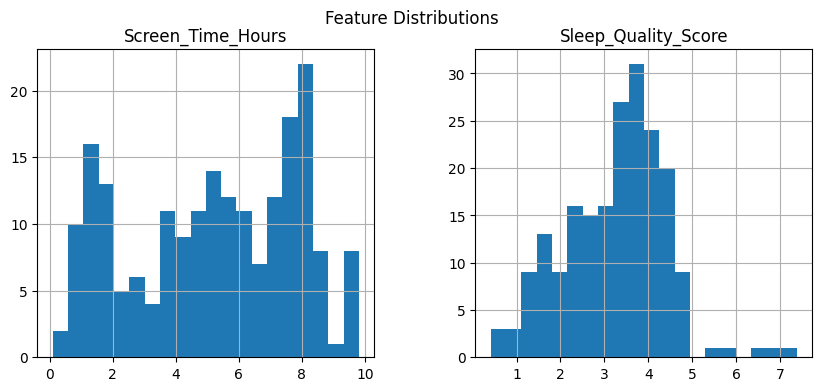

In [3]:
df.hist(bins=20, figsize=(10,4))
plt.suptitle('Feature Distributions')
plt.show()

### Question 2: Visualize Relationship

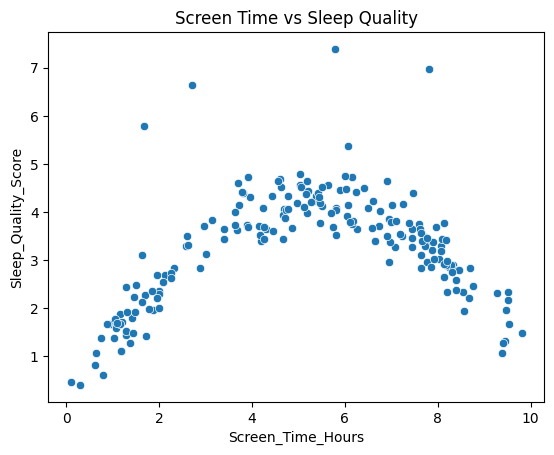

In [4]:
sns.scatterplot(data=df, x='Screen_Time_Hours', y='Sleep_Quality_Score')
plt.title('Screen Time vs Sleep Quality')
plt.show()

### Question 3: Simple Linear Regression

In [5]:
X = df[['Screen_Time_Hours']]
y = df['Sleep_Quality_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

print('R2:', r2_score(y_test, y_pred_linear))
print('MAE:', mean_absolute_error(y_test, y_pred_linear))
print('MSE:', mean_squared_error(y_test, y_pred_linear))

R2: -0.17691130839468805
MAE: 0.9381894320201182
MSE: 1.2652299694827236


### Question 4: Plot Simple Linear Regression line 

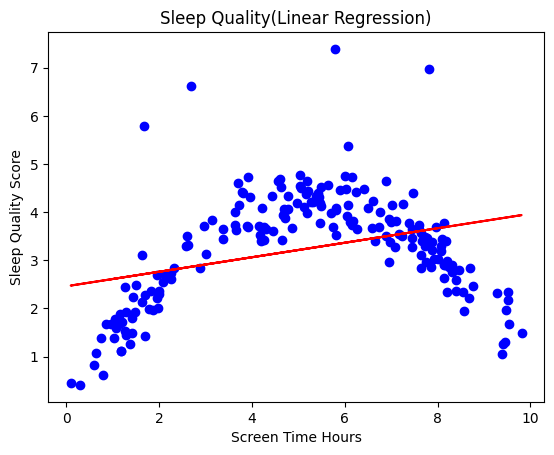

In [6]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, model_linear.predict(X), color = 'red')
plt.title('Sleep Quality(Linear Regression)')
plt.xlabel('Screen Time Hours')
plt.ylabel('Sleep Quality Score')
plt.show()

### Question 5: Polynomial Regression

In [7]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)
y_pred_poly = model_poly.predict(X_poly_test)

print('R2:', r2_score(y_test, y_pred_poly))
print('MAE:', mean_absolute_error(y_test, y_pred_poly))
print('MSE:', mean_squared_error(y_test, y_pred_poly))

R2: 0.8636006892043978
MAE: 0.31009440228818713
MSE: 0.14663509017580892


### Question 6: Plot Polynomial regression line 

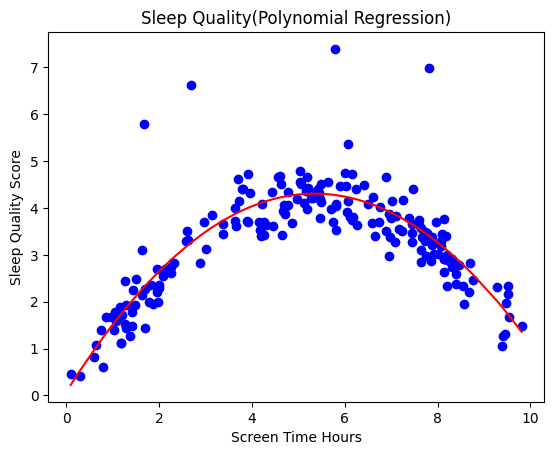

In [8]:
plt.scatter(X, y, color = 'blue')
X_sort = X.sort_values(by='Screen_Time_Hours')   ## Sorting X will give smooth line
plt.plot(X_sort, model_poly.predict(poly.fit_transform(X_sort)), color = 'red')
plt.title('Sleep Quality(Polynomial Regression)')
plt.xlabel('Screen Time Hours')
plt.ylabel('Sleep Quality Score')
plt.show()

### Question 7: Outlier Detection and Handling

In [9]:
# IQR method to detect outliers
Q1 = df['Sleep_Quality_Score'].quantile(0.25)
Q3 = df['Sleep_Quality_Score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = (df['Sleep_Quality_Score'] < lower) | (df['Sleep_Quality_Score'] > upper)
print(f'Outliers found: {outliers.sum()}')

Outliers found: 3


### Question 8: Capping Outlier

In [16]:
df_capped = df.copy()
df_capped['Sleep_Quality_Score'] = df_capped['Sleep_Quality_Score'].clip(lower=lower, upper=upper)

Xc = df_capped[['Screen_Time_Hours']]
yc = df_capped['Sleep_Quality_Score']
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xc, yc, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_trainc = poly.fit_transform(X_trainc)
X_poly_testc = poly.transform(X_testc)

model_polyc = LinearRegression()
model_polyc.fit(X_poly_trainc, y_trainc)
y_pred_polyc = model_polyc.predict(X_poly_testc)

print('R2:', r2_score(y_testc, y_pred_polyc))
print('MAE:', mean_absolute_error(y_testc, y_pred_polyc))
print('MSE:', mean_squared_error(y_testc, y_pred_polyc))

R2: 0.8664816610320025
MAE: 0.30552564259258447
MSE: 0.1435379222995882


### Question 9: Intercept and coefficients

In [17]:
# Print intercept and coefficients
print("Intercept:", model_poly.intercept_)

# Get feature names from PolynomialFeatures
feature_names = poly.get_feature_names_out(['Screen_Time_Hours'])

# Combine names with coefficients
for name, coef in zip(feature_names, model_poly.coef_):
    print(f"Coefficient for {name}: {coef}")

Intercept: 0.0684501560080868
Coefficient for Screen_Time_Hours: 1.5838515864079787
Coefficient for Screen_Time_Hours^2: -0.14805996473384192
